
size 100
Used batch_size will be: 20

size 1000
Used batch_size will be: 100

size 10000
Used batch_size will be: 1000


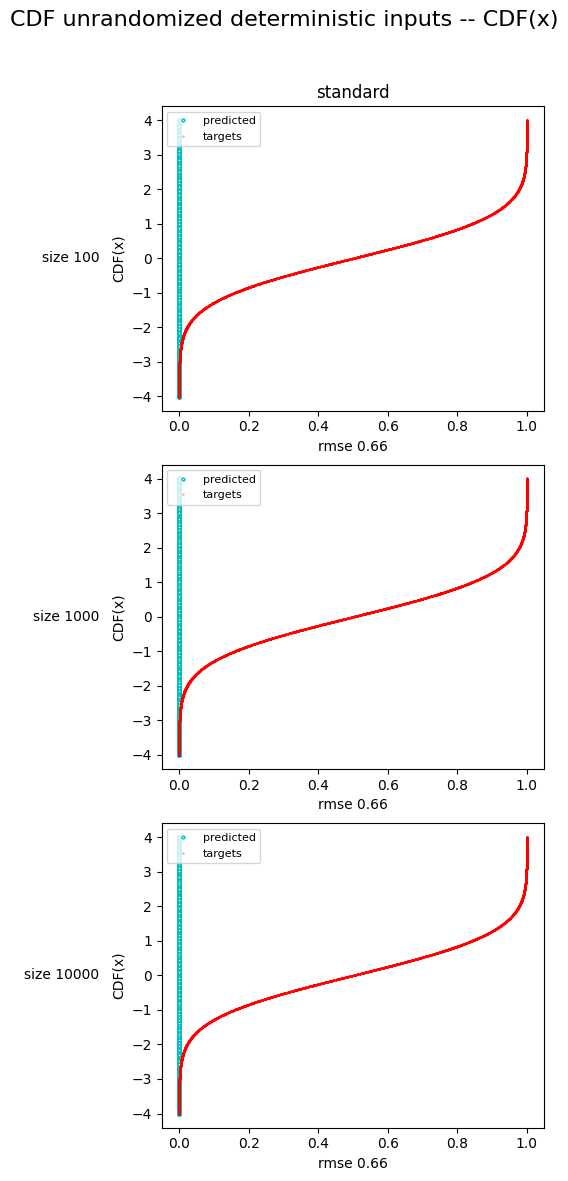

In [2]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..','..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory,'src', 'NNFramework', 'packages.py'))
exec(open(packageFile).read())
### - dataSeed = seed for simulations or (for csv input) for randomization of csv
dataSeed = 1 
weightSeed = 1 

###
### 1. Training data
###

# 10^4 data data points
randomized = False
generator = DataImporter('C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv','x','CDF(x)',randomized = randomized,testDataPath='C:/dev/NeuronalNetworkTensorflowFramework/src/Examples/CumulativeDensitiyFunction/1. CDF unrandomized/cdf_deterministic_data.csv') 
sizes = [100,1000,10000] # training set sizes. Performed one after the other and might be compared
nTest = None # Test set is given through a ratio of 0.8 in generator


###
### 2. Set Nueral network structure / Hyperparameters
### 

hiddenNeurons = 20               # we use equal neurons for each hidden layer
hiddenLayers = 2                # amount of hidden layers
activationFunctions = tf.nn.tanh    # activation functions of hidden layers

epochs = 30
###
### 3. Train network
###
trainingMethod = TrainingMethod.Standard

xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctions, trainingMethod, epochs = epochs)
    
###
### 3. Study results
###   

# show predicitions
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, "x", "CDF(x)", yTest, sizes, True, False, None, trainingMethod)